In [1]:
import pymongo
from pymongo import MongoClient
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edouc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#MongoDB connection
client = MongoClient("mongodb://localhost:27017")
db = client.wikidb
collection = db['wikipedia']

In [4]:
#Storing all text content in the database in a list
query = collection.find({},{'text':1, '_id':0})
liste = list(query)

In [9]:
#Extracting unwanted characters from the texts in the list and collecting them under a single string
unwanted = ['\\','\\n','[',']','(',')','.',',',':',';', "'",' n ', '{','}']
i = ""

#Clean up characters that do not have a place in the ascii table and give errors when printing
for item in liste:
    i += item['text'].encode("ascii", errors="ignore").decode()

for character in unwanted:
        i = i.replace(character, " ")
        
print(i)

   nAn agent-based model  ABM  is a computational model for simulating the actions and interactions of autonomous agents  both individual or collective entities such as organizations or groups  in order to understand the behavior of a system and what governs its outcomes  It combines elements of game theory  complex systems  emergence  computational sociology  multi-agent systems  and evolutionary programming  Monte Carlo methods are used to understand the stochasticity of these models   Particularly within ecology  ABMs are also called individual-based models  IBMs   1  A review of recent literature on individual-based models  agent-based models  and multiagent systems shows that ABMs are used in many scientific domains including biology  ecology and social science  2  Agent-based modeling is related to  but distinct from  the concept of multi-agent systems or multi-agent simulation in that the goal of ABM is to search for explanatory insight into the collective behavior of agents obe

In [10]:
#Separate the i string word by word and clear the stop-words with nltk and wordcloud libraries
text_tokens = word_tokenize(i)
tokens_without_sw = [word for word in text_tokens if word not in STOPWORDS]

In [11]:
#creating the word cloud
wordcloud = WordCloud().generate(i)

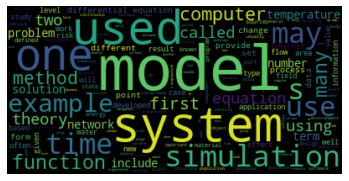

In [12]:
#plotting the word cloud with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()